In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud

In [6]:

# Load the dataset (Assuming it's in CSV format with columns 'Text' and 'Score')
df = pd.read_csv("../amazon-food-review-sentiment-analysis/amazon-fine-food-reviews/Reviews.csv")

# Basic Data Exploration
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


/Users/abigailwoolley/SmileIdentity/Projects/PersonalWork/amazon-food-review-sentiment-analysis/nlp_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailwoolley/SmileIdentity/Projects/PersonalWork/amazon-food-review-sentiment-analysis/nlp_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailwoolley/SmileIdentity/Projects/PersonalWork/amazon-food-review-sentiment-analysis/nlp_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.t

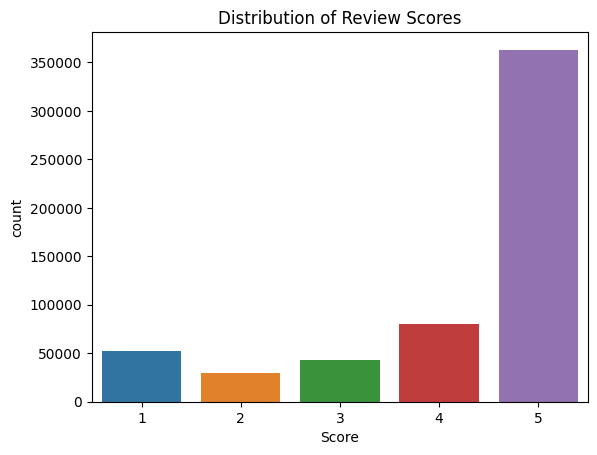

In [7]:
# Visualizations
# Plot distribution of review scores
sns.countplot(x='Score', data=df)
plt.title('Distribution of Review Scores')
plt.show()

#### Text Preprocessing
 Remove stopwords and perform basic text cleaning

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abigailwoolley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def preprocess_text(text):
    words = text.split()
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['Cleaned_Text'] = df['Text'].apply(preprocess_text)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts a...,Positive
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around pillowy citrus gelatin nuts ...,Positive


##### Sentiment Analysis
Use TextBlob to perform sentiment analysis

In [10]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Cleaned_Text'].apply(analyze_sentiment)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts a...,Positive
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around pillowy citrus gelatin nuts ...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great wide assortment yummy delive...,Positive


/Users/abigailwoolley/SmileIdentity/Projects/PersonalWork/amazon-food-review-sentiment-analysis/nlp_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailwoolley/SmileIdentity/Projects/PersonalWork/amazon-food-review-sentiment-analysis/nlp_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailwoolley/SmileIdentity/Projects/PersonalWork/amazon-food-review-sentiment-analysis/nlp_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.t

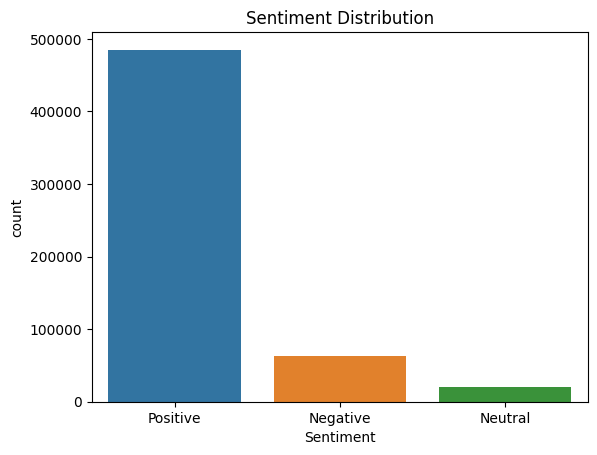

In [11]:
# Visualize Sentiment Distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [12]:
# Sentiment Analysis Results
# Calculate and print the overall sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

# Average sentiment score
average_polarity = df['Cleaned_Text'].apply(lambda x: TextBlob(x).sentiment.polarity).mean()
print(f'Average Polarity Score: {average_polarity:.2f}')

# Display sample positive and negative reviews
positive_reviews = df[df['Sentiment'] == 'Positive']['Text'].sample(3)
negative_reviews = df[df['Sentiment'] == 'Negative']['Text'].sample(3)

print("Sample Positive Reviews:")
for review in positive_reviews:
    print(review)

print("\nSample Negative Reviews:")
for review in negative_reviews:
    print(review)

Sentiment
Positive    485039
Negative     62611
Neutral      20804
Name: count, dtype: int64
Average Polarity Score: 0.24
Sample Positive Reviews:
These USED to be whole pig ears two years ago.... but now?<br />They are just pig ear pieces!!  What a total RIP-OFF!!<br />What is next?  Pig ear "chips"??<br />This is an embarrassment to the marketing industry... cheating<br />the customer.  And, it doesn't matter whether they were bought<br />on Amazon -- or at Sam's.... the result is the same.<br />If the package says "25 PIG EARS"... then to package 'pieces'<br />is a total FRAUD.  I wonder if a lawsuit against the company would help??
These are my favorite cookies.  I got hooked on them during a trip to Italy and am thrilled to finally be able to get them in the US.  Love 'em!
Getting grain free treats for training usually leaves three options: hard biscuits (and who wants to work for those?), cooked meat (which is gross to handle), or commercial meaty grain-free treats which cost an 

In [32]:
positive_reviews = positive_reviews.reset_index(drop=True).apply(str)
negative_reviews = negative_reviews.reset_index(drop=True).apply(str)

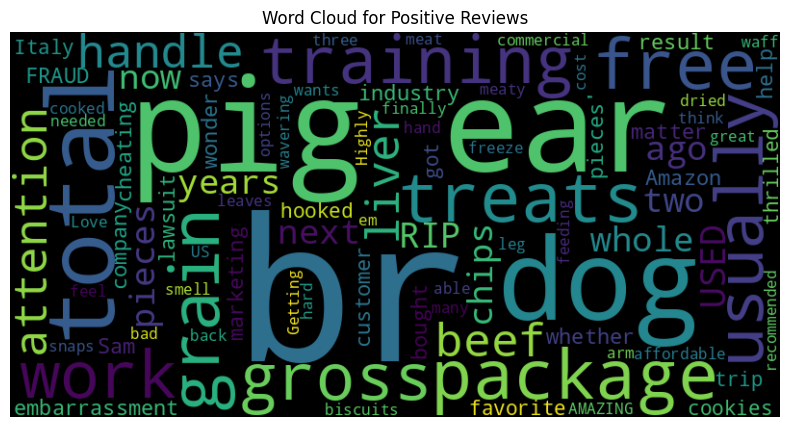

In [31]:
# Assuming 'positive_reviews' is your Pandas Series
# Concatenate the text from all rows into a single string
positive_reviews_text = ' '.join(positive_reviews)

# Generate Word Cloud for Positive Reviews
wordcloud_positive = WordCloud(width=800, height=400).generate(positive_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

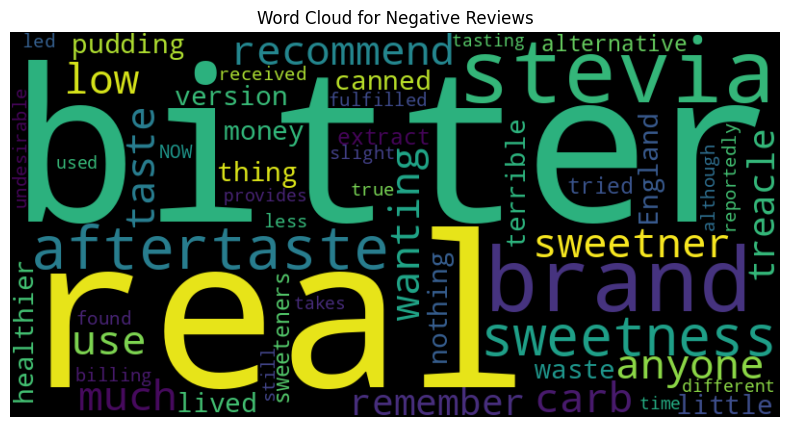

In [34]:
negative_reviews_text = ' '.join(negative_reviews)

# Generate Word Cloud for Negative Reviews
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

/Users/abigailwoolley/SmileIdentity/Projects/PersonalWork/amazon-food-review-sentiment-analysis/nlp_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailwoolley/SmileIdentity/Projects/PersonalWork/amazon-food-review-sentiment-analysis/nlp_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


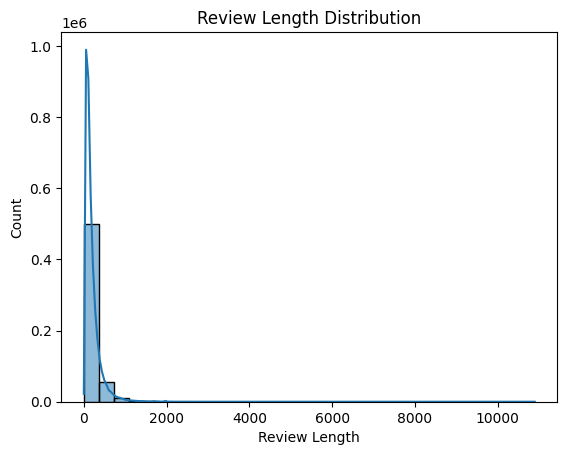

In [35]:
# Analyzing Review Lengths
df['Review_Length'] = df['Cleaned_Text'].apply(len)

# Visualize Review Length Distribution
sns.histplot(df['Review_Length'], bins=30, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

In [37]:
# Detailed Insights into Positive and Negative Reviews
def get_top_keywords(text, num_keywords=10):
    words = text.split()
    freq_dist = nltk.FreqDist(words)
    return freq_dist.most_common(num_keywords)

In [39]:
# Top Keywords in Positive Reviews
top_keywords_positive = get_top_keywords(positive_reviews_text)
print('Top Keywords in Positive Reviews:')
for keyword, count in top_keywords_positive:
    print(f'{keyword}: {count}')

# Top Keywords in Negative Reviews
top_keywords_negative = get_top_keywords(negative_reviews_text)
print('\nTop Keywords in Negative Reviews:')
for keyword, count in top_keywords_negative:
    print(f'{keyword}: {count}')

Top Keywords in Positive Reviews:
to: 10
the: 8
a: 6
is: 5
are: 3
I: 3
them: 3
and: 3
for: 3
/><br: 3

Top Keywords in Negative Reviews:
I: 6
to: 6
a: 4
that: 3
and: 3
is: 3
had: 3
this: 2
have: 2
there: 2
